In [ ]:
#continuation of transport dataset
#uploading and reading dataset

#آپلود فایل از طریق گوگل درایو
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#reading excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

transport_df=pd.read_excel('/content/drive/MyDrive/transportation_phase2.Zeinab_Jafarzadeh/transport1403.xlsx')

In [ ]:
#5 first rows of dataset with head()
transport_df.head()

,Value added insurance premium,Received from driver,scale fee,Evacuation fee,Added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,Product code,Distance,Weight,Calculateion fare,rent,Bill of lading number,Bill of lading series,Company name,Company code,Year
0,144000,12669000,0,0,0,5616000,14:04,14:05,1403/01/05,4992000,...,6650400,148,22000,62400000,62400000,3542008,1402/14,بلم لجستيک,111100195,1403
1,144000,12669000,0,0,0,5616000,13:21,13:22,1403/01/05,4992000,...,6650400,148,22000,62400000,62400000,3542007,1402/14,بلم لجستيک,111100195,1403
2,144000,12704000,0,0,0,5634000,13:12,13:13,1403/01/05,5008000,...,6650400,148,22000,62600000,62600000,3542005,1402/14,بلم لجستيک,111100195,1403
3,144000,12704000,0,0,0,5634000,13:16,13:17,1403/01/05,5008000,...,6650400,148,22000,62600000,62600000,3542006,1402/14,بلم لجستيک,111100195,1403
4,81000,647500,0,0,0,1665000,13:28,13:33,1403/01/05,1480000,...,5600701,370,2100,18500000,18500000,3680279,1402/14,خليج فارس (تهران ),111100459,1403


In [ ]:
transport_df['Unnamed: 24']

,Unnamed: 24
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
601212,NaN
601213,NaN
601214,NaN
601215,NaN


In [ ]:
#حذف ستون مذکور
transport_df=transport_df.drop(columns=['Unnamed: 24'])

In [ ]:
#طبق تعداد ستونهایی که در زیر می بینید یک ستون حذف شده است
transport_df.shape

(601217, 42)

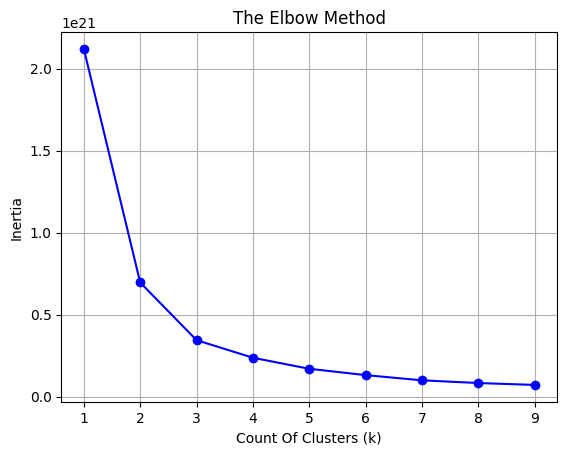

In [ ]:
#K-Means Clustering

#importing needed libreries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#(Elbow)بررسی تعداد خوشه ها با روش
inertia = []
k_range = range(1,10)
for k in k_range:
  kmeans = KMeans(n_clusters = k , random_state=42)
  kmeans.fit(transport_df[['Calculateion fare']])
  inertia.append(kmeans.inertia_)

#(Elbow)رسم نمودار
plt.plot(list(k_range),inertia,'bo-')
plt.xlabel('Count Of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
#(Elbow)اجرای مدل با خوشه بدست آمده در روش
kmeans = KMeans(n_clusters=4,random_state=42)
transport_df['kmeans_cluster_cal_fare']=kmeans.fit_predict(transport_df[['Calculateion fare']])

#(kmeans_cluster_cal_fare)مشاهده ستون
transport_df['kmeans_cluster_cal_fare']

,kmeans_cluster_cal_fare
0,2
1,2
2,2
3,2
4,0
...,...
601212,0
601213,0
601214,1
601215,0


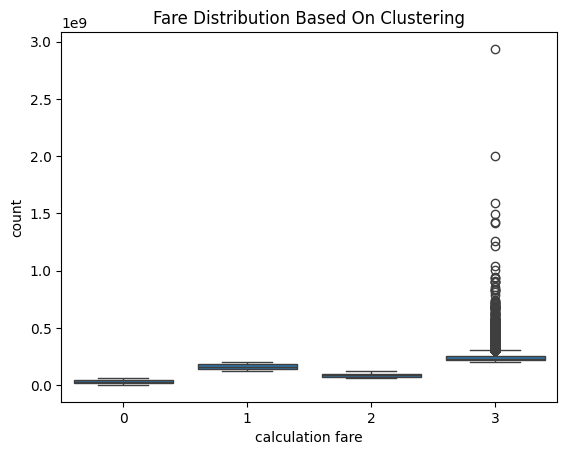

In [ ]:
#رسم نمودار خوشه ها و توزیع آنها
#boxplot()
plt.title('Fare Distribution Based On Clustering')
plt.xlabel('calculation fare')
plt.ylabel('count')
sns.boxplot(data=transport_df,x='kmeans_cluster_cal_fare',y='Calculateion fare')
plt.show()

In [ ]:
#advanced clustering with PCA method


#جدا کردن ستون های عددی
transport_df_numercal=transport_df.select_dtypes(include=['int','float'])
transport_df_numercal.columns

Index(['Value added insurance premium', 'Received from driver ', 'scale fee',
       'Evacuation  fee', 'Added value', 'Complications of moving goods',
       'Company commission', 'Insurance amount', 'Loading fee', 'Total fare',
       'Recipient's national ID', 'Sender's national ID',
       'Postal code of recipient', 'Postal code of the sender',
       'Device smart card', 'Driver smart code', 'Packaging code',
       'License plate code', 'Serial code', 'Loader code',
       'Destination city code', 'Code of the city of origin', 'Product code',
       'Distance', 'Weight', 'Calculateion fare', 'rent',
       'Bill of lading number', 'Company code', 'Year',
       'kmeans_cluster_cal_fare'],
      dtype='object')

advanced clustering with PCA methodمراحل انجام

1.PCA به 2 بعد کاهش بعد با

2.  KMeans clustering اجرای

3. رسم پراکنش نقاط با رنگ‌بندی بر اساس خوشه‌ها.



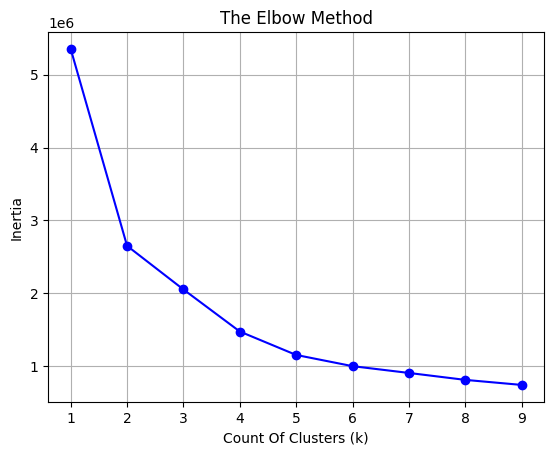

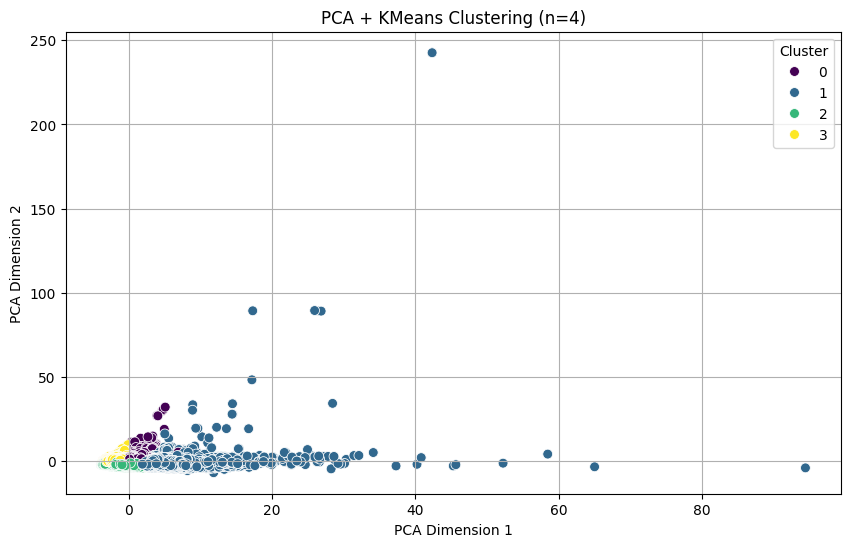

In [ ]:
#import needed libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#deleting null values
#transport_df_numercal=transport_df_numercal.dropna()

#normalizing data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(transport_df_numercal)

#کاهش بعد با روش
#PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(scaled_data)


#(Elbow)بررسی تعداد خوشه ها با روش
inertia = []
k_range = range(1,10)
for k in k_range:
  kmeans = KMeans(n_clusters = k , random_state=42)
  kmeans.fit(pca_result)
  inertia.append(kmeans.inertia_)

#(Elbow)رسم نمودار
plt.plot(list(k_range),inertia,'bo-')
plt.xlabel('Count Of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.grid(True)
plt.show()





#Clustering with k-means method
kmeans=KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

#رسم نمودار
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('PCA + KMeans Clustering (n=4)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

می خواهیم روش

RFM

را بر روی این دیتاست پیاده سازی کنیم

In [ ]:
#RFM
#R -> RECENCY  = آخرین خرید مشتری
#F -> FREQUENCY = تعداد دفعات خرید
#M -> MONETARY = مجموع مبلغ خرید
#برای تبدیل تاریخ شمسی به میلادی به این کتابخانه نیاز داریم
#!pip install jdatetime
#import jdatetime

# تابع برای تبدیل یک تاریخ شمسی به میلادی
#def shamsi_to_gregorian(date_str):
#    try:
#        parts = date_str.split('/')
#        year, month, day = map(int, parts)
#        return jdatetime.date(year, month, day).togregorian()
#    except:
#        return pd.NaT

# اعمال تابع روی ستون
#transport_df['Delivery Date'] = transport_df['Delivery date'].apply(shamsi_to_gregorian)
# تبدیل کنیم(datetime) باید تاریخ تحویل را به
# است(object)زیرا تاریخ تحویل از نوع
#transport_df['Delivery date'] = pd.to_datetime(transport_df['Delivery date'], errors='coerce')


In [ ]:
#برای اطمینان از اینکه تاریخ به میلادی تبدیل شده خروجی می گیریم
#transport_df['Delivery Date']

In [ ]:
#حذف ردیف های بدون تاریخ تحویل
#transport_df = transport_df.dropna(subset=['Delivery date'])
#transport_df.shape

In [ ]:
#تعیین آخرین تاریخ برای تاریخ مرجع
#reference_date=transport_df['Delivery Date'].max()   #(2025, 3, 19)

#making rfm table
#rfm=transport_df.groupby('Sender\'s national ID').agg({
#    'Delivery date' : lambda x : (reference_date - x.max()).days, #Recency
#    'Bill of lading number' : 'count',                            #Frequency
#    'Calculateion fare' : 'sum'                                    #Monetary
#})

#changing name of columns
#rfm.columns = ['Recency','Frequency','Monetary']
#rfm


انجام تشخیص ناهنجاری

(Anomaly Detection)

به روش

 Isolation Forest

Anomaly_isolation_forest
 1    571157
-1     30060
Name: count, dtype: int64


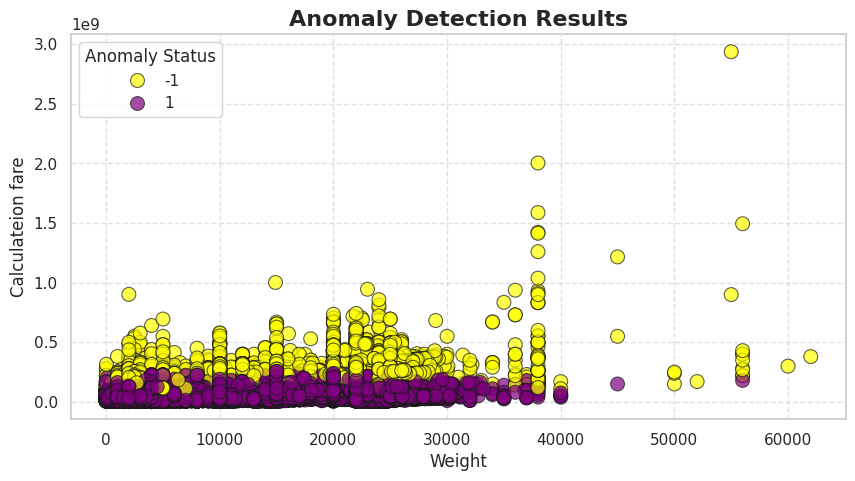

0         1
1         1
2         1
3         1
4         1
         ..
601212    1
601213    1
601214    1
601215    1
601216   -1
Name: Anomaly_isolation_forest, Length: 601217, dtype: int64


In [ ]:
#در ابتدا ستون های عددی ای که از نوع کرایه یا مثلا پولی هستند را جدا می کنیم
#در این مسئله ستونهایی که اعدادی که کد هستند ، دارند ، بدردمان نمی خورد
features = [
    'Value added insurance premium',
    'Received from driver ',
    'scale fee',
    'Evacuation  fee',
    'Added value',
    'Complications of moving goods',
    'Company commission',
    'Insurance amount',
    'Loading fee',
    'Total fare',
    'Distance',
    'Weight',
    'Calculateion fare',
    'rent'
]

#importing needed libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
#حذف ستون هایی که مقادیر خالی دارند
X=transport_df[features].dropna()
#نرمالسازی داده ها
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


#اجرای الگوریتم تشخیص ناهنجاری با
#isolation forest
model1=IsolationForest(contamination=0.05,random_state=42)   #contamination=0.05   یعنی 0.05 از داده ها رو ناهنجار در نظر می گیرد
#فیت کردن مدل
model1.fit(X_scaled)

#پیش بینی مدل : -1 یعنی ناهنجار و 1 یعنی نرمال و هنجار
transport_df['Anomaly_isolation_forest']=model1.predict(X_scaled)

#مقدار داده های هنجار و ناهنجار را می شمرد
print(transport_df['Anomaly_isolation_forest'].value_counts())


#رسم نمودار
#x='Weight'
#y='Calculateion fare'
#براساس ستون
#Anomaly_isolation_forest
plt.figure(figsize=(10,5))
# تم گرافیکی
sns.set(style="whitegrid")
sns.scatterplot(x=X['Weight'], y=X['Calculateion fare'],
                hue=transport_df['Anomaly_isolation_forest'],
                s=100 ,  # s -> اندازه نقطه ها
                alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
                palette={-1:'yellow',1:'purple'}
            )
plt.xlabel('Weight' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')
#legend
plt.legend(title="Anomaly Status",loc='best')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()



print(transport_df['Anomaly_isolation_forest'])

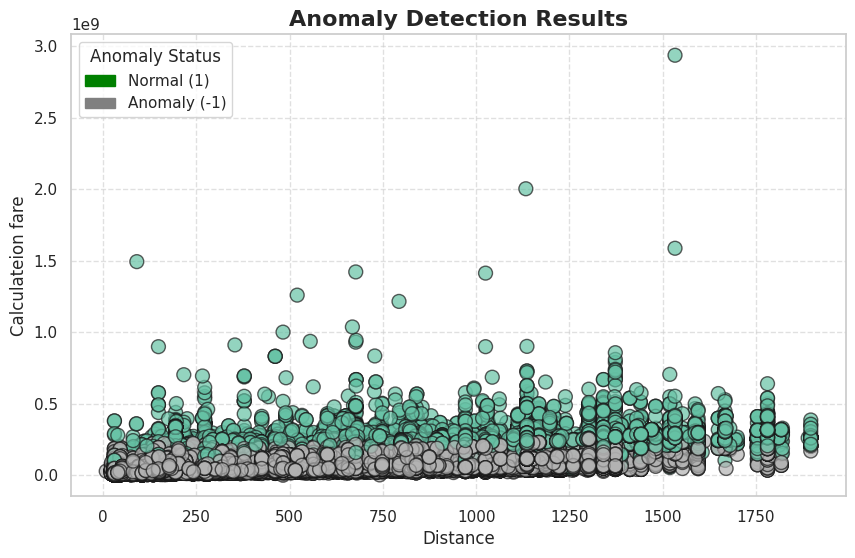

In [ ]:
#رسم نمودار
#برای
# x='Distance'
# y='Calculateion fare'
#براساس ستون
#Anomaly_isolation_forest
plt.figure(figsize=(10,6))
# تم گرافیکی
sns.set(style="whitegrid")
plt.scatter(X['Distance'], X['Calculateion fare'], s=100 ,  # s -> اندازه نقطه ها
             alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
            c=transport_df['Anomaly_isolation_forest'],   #Anomaly_isolation_forestرنگ ها براساس ستون
            cmap='Set2')   #colormap
plt.xlabel('Distance' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')

#تعریف رنگ ها و راهنمای رنگ ها برای
#legend
normal_points = mpatches.Patch(color = 'green' , label='Normal (1)')
anomaly_points = mpatches.Patch(color = 'gray' , label='Anomaly (-1)')

plt.legend(handles=[normal_points,anomaly_points],title="Anomaly Status",loc='upper left')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()

انجام تشخیص ناهنجاری با استفاده از روش

KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#داده های نرمالسازی شده اند
#k محاسبه میانگین فاصله با تا همسایه نزدیک با
k=5
knn_model = NearestNeighbors(n_neighbors=k)
#آموزش مدل و فیت کردن آن
knn_model.fit(X_scaled)

#فاصله و ایندکس همسایه ها
distances ,indices =knn_model.kneighbors(X_scaled)

#نمره ناهنجاری =
#kمیانگین فاصله تا همسایه
anomaly_scores = distances.mean(axis=1)

#تعیین آستانه
threshold = anomaly_scores.mean() + 2 * anomaly_scores.std()
#برچسب گذاری  :
# نرمال = 0
# ناهنجار = 1
labels = (anomaly_scores > threshold).astype(int)

#اضافه کردن برچسب ها به دیتاست
transport_df['Anomaly_knn']=labels

transport_df['Anomaly_knn'].value_counts()


print(transport_df['Anomaly_knn'])

0         0
1         0
2         0
3         0
4         0
         ..
601212    0
601213    0
601214    0
601215    0
601216    0
Name: Anomaly_knn, Length: 601217, dtype: int64


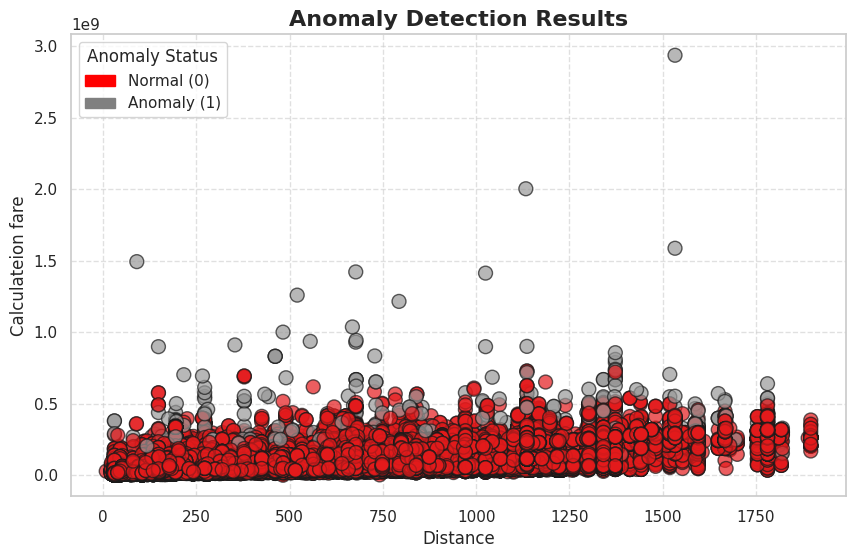

In [ ]:
#رسم نمودار
# x= 'Distance'
# y='Calculateion fare'
#برحسب
#Anomaly_knn
plt.figure(figsize=(10,6))
# تم گرافیکی
sns.set(style="whitegrid")
plt.scatter(X['Distance'], X['Calculateion fare'], s=100 ,  # s -> اندازه نقطه ها
             alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
            c=transport_df['Anomaly_knn'],   #Anomaly_knnرنگ ها براساس ستون
            cmap='Set1')   #colormap
plt.xlabel('Distance' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')

#تعریف رنگ ها و راهنمای رنگ ها برای
#legend
normal_points = mpatches.Patch(color = 'red' , label='Normal (0)')
anomaly_points = mpatches.Patch(color = 'gray' , label='Anomaly (1)')

plt.legend(handles=[normal_points,anomaly_points],title="Anomaly Status",loc='upper left')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()

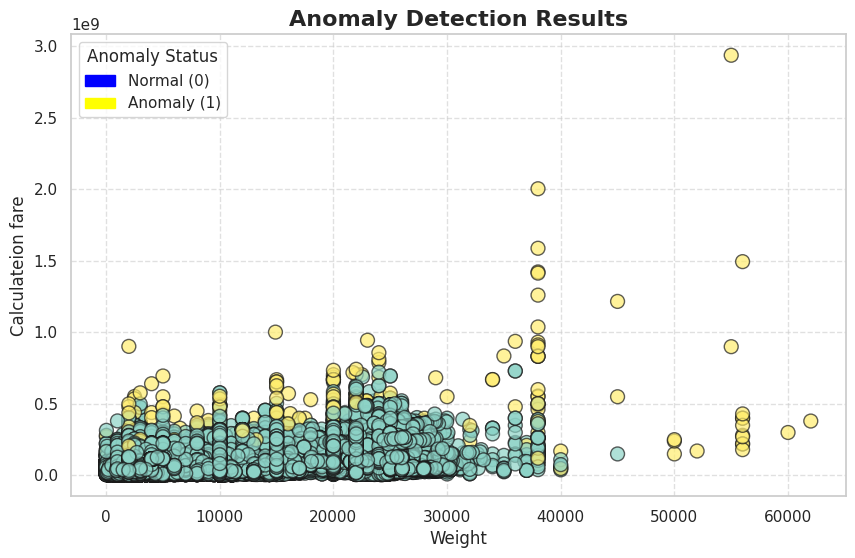

In [ ]:
#رسم نمودار
# x= 'Distance'
# y='Calculateion fare'
#برحسب
#Anomaly_knn
plt.figure(figsize=(10,6))
# تم گرافیکی
sns.set(style="whitegrid")
plt.scatter(X['Weight'], X['Calculateion fare'], s=100 ,  # s -> اندازه نقطه ها
             alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
            c=transport_df['Anomaly_knn'],   #Anomaly_knnرنگ ها براساس ستون
            cmap='Set3')   #colormap
plt.xlabel('Weight' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')

#تعریف رنگ ها و راهنمای رنگ ها برای
#legend
normal_points = mpatches.Patch(color = 'blue' , label='Normal (0)')
anomaly_points = mpatches.Patch(color = 'yellow' , label='Anomaly (1)')

plt.legend(handles=[normal_points,anomaly_points],title="Anomaly Status",loc='upper left')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()

انجام تشخیص ناهنجاری با روش

IQR

برای سه ستون

'Weight', 'Calculateion fare','Distance'

In [ ]:
#choosing columns
features = ['Weight', 'Calculateion fare','Distance']

for feature in features :
  Q1 = transport_df[feature].quantile(0.25) #محاسبه چارک اول
  Q3 = transport_df[feature].quantile(0.75) #محاسبه چارک سوم
  IQR = Q3 -Q1    #فاصله بین چارک سوم و چارک اول هست

  # تعیین مرزهای ناهنجاری
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  #برچسب گذاری داده ها
  #normal = 0
  #anomaly = 1
  transport_df[f'Anomaly_IQR_{feature}'] = (
      (transport_df[feature] < lower_bound) |
      (transport_df[feature] > upper_bound)
  ).astype(int)



  #محاسبه تعداد داد های نرمال و ناهنجار برای هر ستون
  normal_count = (transport_df[f'Anomaly_IQR_{feature}'] == 0).sum()
  anomaly_count = (transport_df[f'Anomaly_IQR_{feature}'] == 1).sum()

  print(f'feature : {feature}')
  print("Count of normal data :", normal_count)
  print("Count of anomaly data :",anomaly_count )
  print("---")

print(transport_df['Anomaly_IQR_Weight'])

feature : Weight
Count of normal data : 601202
Count of anomaly data : 15
---
feature : Calculateion fare
Count of normal data : 575700
Count of anomaly data : 25517
---
feature : Distance
Count of normal data : 596563
Count of anomaly data : 4654
---
0         0
1         0
2         0
3         0
4         0
         ..
601212    0
601213    0
601214    0
601215    0
601216    0
Name: Anomaly_IQR_Weight, Length: 601217, dtype: int64


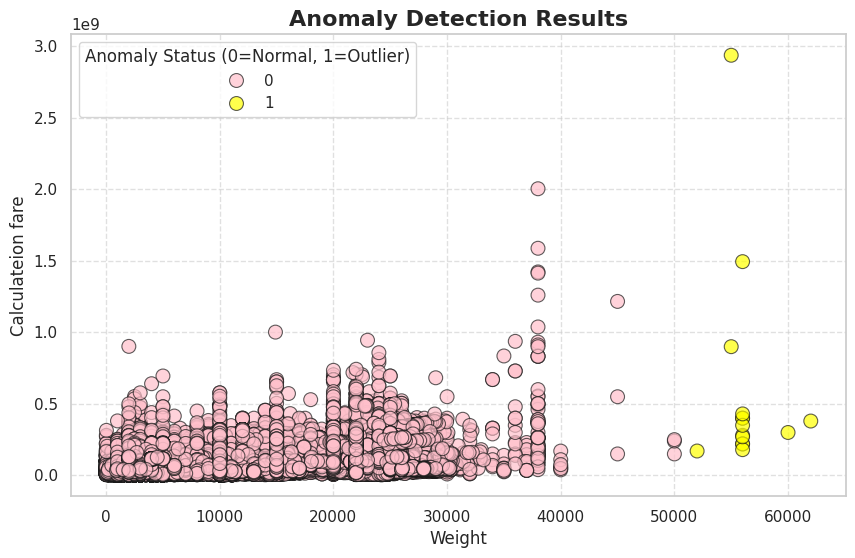

In [ ]:
#رسم نمودار
# x= 'Weight'
# y='Calculateion fare'
#برحسب
#Anomaly_IQR_Weight
plt.figure(figsize=(10,6))
# تم گرافیکی
sns.set(style="whitegrid")
sns.scatterplot(x=transport_df['Weight'],
            y=transport_df['Calculateion fare'],
            hue=transport_df['Anomaly_IQR_Weight'],
            s=100 ,  # s -> اندازه نقطه ها
            alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
            palette={0:'pink',1:'yellow'})   #colormap
plt.xlabel('Weight' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')
plt.legend(title="Anomaly Status (0=Normal, 1=Outlier)",loc='upper left')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()

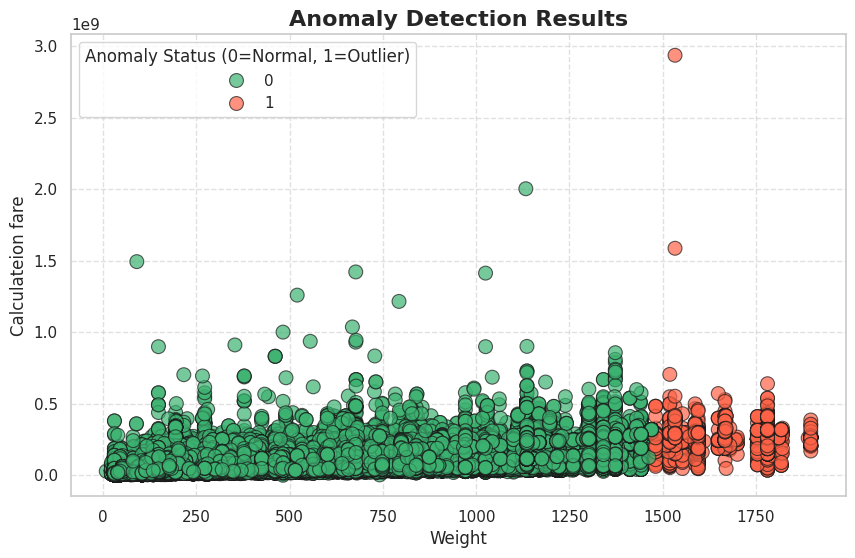

In [ ]:
#رسم نمودار
# x= 'Distance'
# y='Calculateion fare'
#برحسب
#Anomaly_IQR_Distance
plt.figure(figsize=(10,6))
# تم گرافیکی
sns.set(style="whitegrid")
sns.scatterplot(x=transport_df['Distance'],
            y=transport_df['Calculateion fare'],
            hue=transport_df['Anomaly_IQR_Distance'],
            s=100 ,  # s -> اندازه نقطه ها
            alpha=0.7,       # alpha -> شفافیت
            edgecolors='k' ,  # edgecolors -> حاشیه مشکی
            palette={0:'#3CB371',1:'#FF6347'})
plt.xlabel('Weight' , fontsize=12)
plt.ylabel('Calculateion fare' , fontsize=12)
plt.title('Anomaly Detection Results',fontsize=16,fontweight='bold')
plt.legend(title="Anomaly Status (0=Normal, 1=Outlier)",loc='upper left')
plt.grid(True , linestyle='--', alpha=0.6)
plt.show()

In [ ]:
print(transport_df.columns)


transport_df = transport_df.drop(['Anomaly_isolation_forest_contamination', 'Anomaly_isolation_forest_threshold'], axis=1)

print(transport_df.columns)

Index(['Value added insurance premium', 'Received from driver ', 'scale fee',
       'Evacuation  fee', 'Added value', 'Complications of moving goods',
       'Bill of lading registration time', 'Tracking code watch',
       'Date of interception', 'Company commission', 'Insurance amount',
       'Loading fee', 'Total fare', 'Recipient's national ID',
       'Sender's national ID', 'Postal code of recipient',
       'Postal code of the sender', 'Interception', 'Device smart card',
       'Driver smart code', 'Packaging code', 'License plate code',
       'Serial code', 'License plate number', 'Delivery date', 'Date of issue',
       'Loader code', 'The name of the destination city',
       'Destination city code', 'Name of the city of origin',
       'Code of the city of origin', 'Product name', 'Product code',
       'Distance', 'Weight', 'Calculateion fare', 'rent',
       'Bill of lading number', 'Bill of lading series', 'Company name',
       'Company code', 'Year', 'kmeans_cluster

ساخت ستون جدید تاریخ های میلادی برای تمام ستون های دارای تاریخ شمسی مثل

Delivery date

Date of issue

Date of interception

In [ ]:
#باید این کتابخانه را نصب کنیم تا بتوانیم تاریخ شمسی را به تاریخ میلادی برگردانیم زیرا برای تبدیل دیتاتایپ به تاریخ ، پانداس تاریخ شمسی پشتیبانی نمی کند
!pip install jdatetime

In [ ]:
import jdatetime
from datetime import datetime

#تابع تبدیل تاریخ شمسی به میلادی
def shamsi_to_miladi(date_str):
  #فرض بر اینکه که فرمت تاریخ به صورت : 1403/02/01
  y, m, d = map(int, date_str.split('/'))
  return jdatetime.date(y, m, d).togregorian()


#تبدیل تاریخ شمسی به میلادی
transport_df['Date of issue(miladi)']=transport_df['Date of issue'].apply(shamsi_to_miladi)
transport_df['Delivery date(miladi)']=transport_df['Delivery date'].apply(shamsi_to_miladi)
transport_df['Date of interception(miladi)']=transport_df['Date of interception'].apply(shamsi_to_miladi)

In [ ]:
#changing data type of columns from object to datetime

transport_df['Date of issue(miladi)']=pd.to_datetime(transport_df['Date of issue(miladi)'])
transport_df['Delivery date(miladi)']=pd.to_datetime(transport_df['Delivery date(miladi)'])
transport_df['Date of interception(miladi)']=pd.to_datetime(transport_df['Date of interception(miladi)'])

In [ ]:
print(transport_df['Date of issue(miladi)'].dtype)
print(transport_df['Delivery date(miladi)'].dtype)
print(transport_df['Date of interception(miladi)'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [ ]:
transport_df.head()

,Value added insurance premium,Received from driver,scale fee,Evacuation fee,Added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,Calculateion fare,rent,Bill of lading number,Bill of lading series,Company name,Company code,Year,Date of issue(miladi),Delivery date(miladi),Date of interception(miladi)
0,144000,12669000,0,0,0,5616000,14:04,14:05,1403/01/05,4992000,...,62400000,62400000,3542008,1402/14,بلم لجستيک,111100195,1403,2024-03-24,2024-03-25,2024-03-24
1,144000,12669000,0,0,0,5616000,13:21,13:22,1403/01/05,4992000,...,62400000,62400000,3542007,1402/14,بلم لجستيک,111100195,1403,2024-03-24,2024-03-25,2024-03-24
2,144000,12704000,0,0,0,5634000,13:12,13:13,1403/01/05,5008000,...,62600000,62600000,3542005,1402/14,بلم لجستيک,111100195,1403,2024-03-24,2024-03-25,2024-03-24
3,144000,12704000,0,0,0,5634000,13:16,13:17,1403/01/05,5008000,...,62600000,62600000,3542006,1402/14,بلم لجستيک,111100195,1403,2024-03-24,2024-03-25,2024-03-24
4,81000,647500,0,0,0,1665000,13:28,13:33,1403/01/05,1480000,...,18500000,18500000,3680279,1402/14,خليج فارس (تهران ),111100459,1403,2024-03-24,2024-03-25,2024-03-24


In [ ]:
!pip install openpyxl

In [ ]:
transport_df.to_excel("transport_df.xlsx", index=False, engine='openpyxl')

In [ ]:
#دانلود فایل اکسل
from google.colab import files
files.download("transport_df.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transport_df


,Value added insurance premium,Received from driver,scale fee,Evacuation fee,Added value,Complications of moving goods,Bill of lading registration time,Tracking code watch,Date of interception,Company commission,...,Product code,Distance,Weight,Calculateion fare,rent,Bill of lading number,Bill of lading series,Company name,Company code,Year
0,144000,12669000,0,0,0,5616000,14:04,14:05,1403/01/05,4992000,...,6650400,148,22000,62400000,62400000,3542008,1402/14,بلم لجستيک,111100195,1403
1,144000,12669000,0,0,0,5616000,13:21,13:22,1403/01/05,4992000,...,6650400,148,22000,62400000,62400000,3542007,1402/14,بلم لجستيک,111100195,1403
2,144000,12704000,0,0,0,5634000,13:12,13:13,1403/01/05,5008000,...,6650400,148,22000,62600000,62600000,3542005,1402/14,بلم لجستيک,111100195,1403
3,144000,12704000,0,0,0,5634000,13:16,13:17,1403/01/05,5008000,...,6650400,148,22000,62600000,62600000,3542006,1402/14,بلم لجستيک,111100195,1403
4,81000,647500,0,0,0,1665000,13:28,13:33,1403/01/05,1480000,...,5600701,370,2100,18500000,18500000,3680279,1402/14,خليج فارس (تهران ),111100459,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601212,180,7007200,0,0,0,3600000,14:29,14:39,1403/12/27,3200000,...,4225601,319,1500,40000000,40000000,5670923,1403/13,گودرز (شعبه گرگان),979700735,1403
601213,180,5362200,0,0,0,4590000,20:05,20:15,1403/12/27,510000,...,4610300,604,3000,51000000,51000000,5115679,1403/13,گودرز گرگان,979700748,1403
601214,183006,21121500,0,0,0,16200000,20:35,20:45,1403/12/28,1800000,...,1170000,811,22000,180000000,180000000,5115718,1403/13,گودرز گرگان,979700748,1403
601215,180,3682200,0,0,0,3150000,12:28,12:38,1403/12/28,350000,...,7300800,515,2000,35000000,35000000,5116107,1403/13,گودرز گرگان,979700748,1403
